In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [114]:
dataset = pd.read_csv('/content/sample_data/Gold Price Prediction Dataset - Gold Price Prediction Dataset.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
4,21-12-11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,NaN,NaN,122.750000,124.169998,107.838242,B,107.71,107.15,108.17,106.16,145090,A


In [115]:
dataset.shape

(1718, 19)

In [116]:
dataset.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,21
SP_high,21
SP_low,0


In [117]:
print("Shape before dropping:", dataset.shape)
dataset = dataset.dropna(axis = 0, subset = ['SP_open','SP_high'])
print("Shape after dropping:", dataset.shape)

Shape before dropping: (1718, 19)
Shape after dropping: (1697, 19)


In [118]:
print('Total duplicate values:', dataset.duplicated().sum())

Total duplicate values: 0


In [119]:
from sklearn.preprocessing import LabelEncoder
dataset['EU_Trend'].unique()
dataset['OF_Trend'].unique()

enc = LabelEncoder()

dataset['EU_Trend'] = enc.fit_transform(dataset['EU_Trend'])
dataset['OF_Trend'] = enc.fit_transform(dataset['OF_Trend'])
dataset.head()

<ipython-input-119-3529d5a62b9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['EU_Trend'] = enc.fit_transform(dataset['EU_Trend'])
<ipython-input-119-3529d5a62b9d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['OF_Trend'] = enc.fit_transform(dataset['OF_Trend'])


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,0,105.09,104.88,106.50,104.88,14330,0
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,0,103.35,103.51,104.56,102.46,140080,1
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,1,103.64,103.63,104.57,102.37,147880,0
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,0,106.73,104.30,107.27,103.91,170240,0
25,24-01-12,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,114.169380,1,110.03,110.84,111.11,109.70,178430,1


In [120]:
dataset["Date"]

,Date
0,15-12-11
1,16-12-11
2,19-12-11
3,20-12-11
25,24-01-12
...,...
1713,24-12-18
1714,26-12-18
1715,27-12-18
1716,28-12-18


In [121]:
dataset["Date_Converted"] = pd.to_datetime(dataset["Date"])


# dataset["Date_Month"] = dataset["Date_Converted"].apply(lambda row: row.month)


# dataset[['Date_Converted', 'Date_Month']].head()

<ipython-input-121-1d75ac07fa5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Date_Converted"] = pd.to_datetime(dataset["Date"])


In [122]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Date_Converted
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,0,105.09,104.88,106.50,104.88,14330,0,2011-12-15
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,0,103.35,103.51,104.56,102.46,140080,1,2011-12-16
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,1,103.64,103.63,104.57,102.37,147880,0,2011-12-19
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,0,106.73,104.30,107.27,103.91,170240,0,2011-12-20
25,24-01-12,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,114.169380,1,110.03,110.84,111.11,109.70,178430,1,2012-01-24


In [123]:
dataset_corr = dataset.drop(["Date"], axis=1).corr()
dataset_corr

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,Date_Converted
Open,1.000000,0.999508,0.999433,0.998966,0.998966,0.251162,-0.672401,-0.672679,-0.671522,-0.672086,-0.653736,-0.008850,0.704034,0.702559,0.704664,0.701669,-0.213572,-0.043444,-0.666461
High,0.999508,1.000000,0.999244,0.999528,0.999528,0.260372,-0.676257,-0.676500,-0.675438,-0.675961,-0.657662,-0.013979,0.704939,0.703349,0.705559,0.702445,-0.213455,-0.045047,-0.670079
Low,0.999433,0.999244,1.000000,0.999524,0.999524,0.236057,-0.668905,-0.669235,-0.667953,-0.668566,-0.650184,-0.014879,0.704318,0.702698,0.704826,0.701939,-0.214155,-0.046101,-0.663218
Close,0.998966,0.999528,0.999524,1.000000,1.000000,0.245870,-0.672677,-0.672963,-0.671783,-0.672353,-0.654001,-0.018724,0.704395,0.702735,0.704934,0.701914,-0.213694,-0.046419,-0.666612
Adj Close,0.998966,0.999528,0.999524,1.000000,1.000000,0.245870,-0.672677,-0.672963,-0.671783,-0.672353,-0.654001,-0.018724,0.704395,0.702735,0.704934,0.701914,-0.213694,-0.046419,-0.666612
Volume,0.251162,0.260372,0.236057,0.245870,0.245870,1.000000,-0.216142,-0.213723,-0.220814,-0.218071,-0.205768,-0.010406,0.077631,0.080627,0.080916,0.076172,0.030416,0.056198,-0.157871
SP_open,-0.672401,-0.676257,-0.668905,-0.672677,-0.672677,-0.216142,1.000000,0.999784,0.999628,0.999441,0.998405,-0.013949,-0.614787,-0.614808,-0.617247,-0.612331,0.354678,-0.031090,0.963222
SP_high,-0.672679,-0.676500,-0.669235,-0.672963,-0.672963,-0.213723,0.999784,1.000000,0.999492,0.999642,0.998716,-0.014013,-0.615870,-0.615976,-0.618332,-0.613518,0.354786,-0.032685,0.964058
SP_low,-0.671522,-0.675438,-0.667953,-0.671783,-0.671783,-0.220814,0.999628,0.999492,1.000000,0.999740,0.998436,-0.014533,-0.613474,-0.613687,-0.616121,-0.611046,0.352757,-0.034788,0.962196
SP_close,-0.672086,-0.675961,-0.668566,-0.672353,-0.672353,-0.218071,0.999441,0.999642,0.999740,1.000000,0.998838,-0.015274,-0.614987,-0.615283,-0.617634,-0.612662,0.353889,-0.035941,0.963230


In [124]:
dataset = dataset.drop(["Date"], axis=1)

<Axes: >

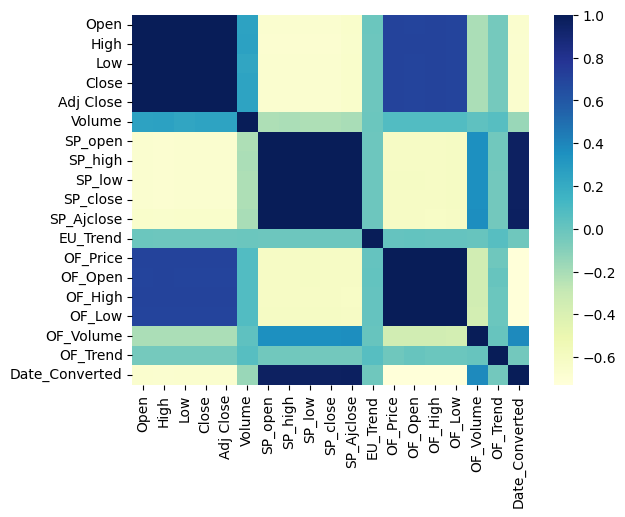

In [125]:
import seaborn as sns
sns.heatmap(dataset_corr, cmap = 'YlGnBu')

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Adj Close', axis = 1), dataset['Adj Close'],
                                                    random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

In [127]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn.fit(X_train_scaled, y_train)


print("KNN test accuracy after standard scaling: {:.2f}".format(knn.score(X_test_scaled, y_test)))

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)